# MNIST Digit Recognition - Data Exploration

## 1. Import Libraries

In [5]:
# Importing the required libraries
import tensorflow as tf 
from tensorflow import keras
import numpy as np # for numeric operations
import matplotlib.pyplot as plt # to generate plots as we go
import pandas as pd # for dataframing and manipulation
import seaborn as sns
from sklearn.model_selection import train_test_split # to split the data into training and testing partitions

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# setting random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)

TensorFlow version: 2.20.0
NumPy version: 2.2.6


## 2. Load MNIST Dataset

In [6]:
# Loading thr MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Displaying some basic statistics
print("\nData Statistics:")
print(f"Training images range: [{X_train.min()}, {X_train.max()}]")
print(f"Test images range: [{X_test.min()}, {X_test.max()}]")
print(f"Unique labels: {np.unique(y_train)}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Data Statistics:
Training images range: [0, 255]
Test images range: [0, 255]
Unique labels: [0 1 2 3 4 5 6 7 8 9]


## 3. Visualize Sample Images

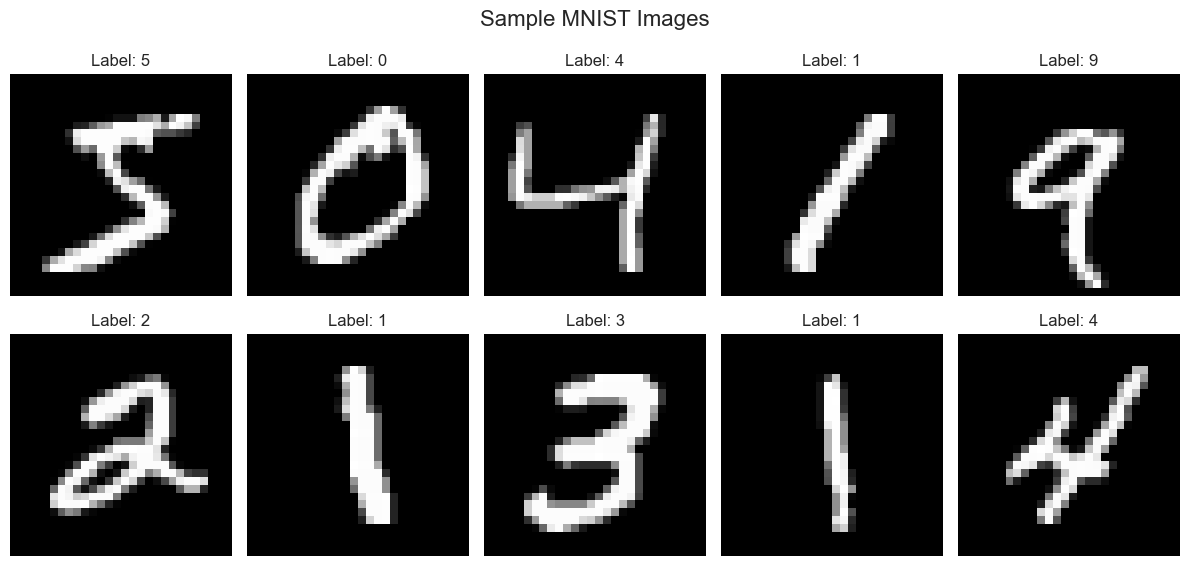

In [7]:
# Display sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

# showing 10 images from the daatset 
for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')

plt.suptitle("Sample MNIST Images", fontsize=16)
plt.tight_layout()
plt.show()

## 4. Analyze Label Distribution

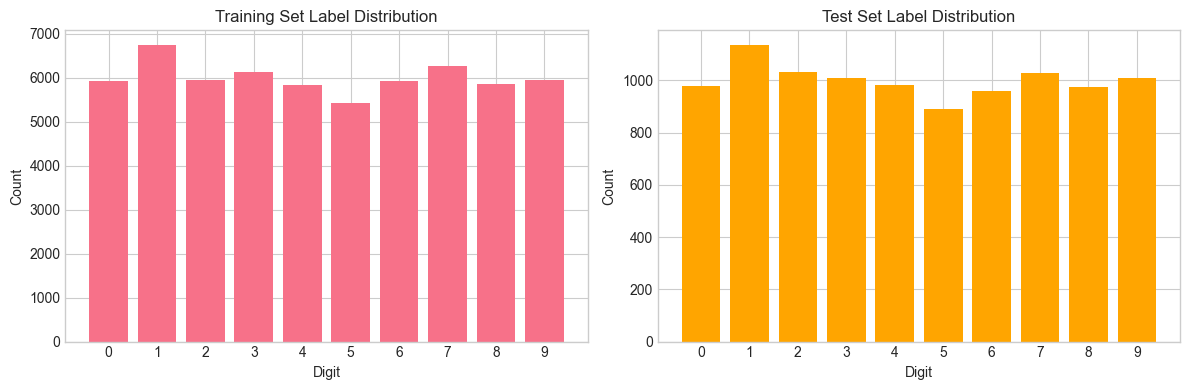

Training set distribution:
label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

Test set distribution:
label
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: count, dtype: int64


In [8]:
# Create a DataFrame for label distribution
train_labels_df = pd.DataFrame(y_train, columns=['label'])
test_labels_df = pd.DataFrame(y_test, columns=['label'])

# Plot label distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Training set distribution
train_counts = train_labels_df['label'].value_counts().sort_index()
ax1.bar(train_counts.index, train_counts.values)
ax1.set_title("Training Set Label Distribution")
ax1.set_xlabel("Digit")
ax1.set_ylabel("Count")
ax1.set_xticks(range(10))

# Test set distribution
test_counts = test_labels_df['label'].value_counts().sort_index()
ax2.bar(test_counts.index, test_counts.values, color='orange')
ax2.set_title("Test Set Label Distribution")
ax2.set_xlabel("Digit")
ax2.set_ylabel("Count")
ax2.set_xticks(range(10))

plt.tight_layout()
plt.show()

print("Training set distribution:")
print(train_counts)
print("\nTest set distribution:")
print(test_counts)